
# ***IMPORT THE CSV FILE***


In [ ]:
from google.colab import files

upload = files.upload()

Saving threegorges-water-storage.csv to threegorges-water-storage.csv


# ***DATA LOADING & PREPROCESSING***

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("/content/sample_data/threegorges-water-storage.csv")
df.head()

,measurement_date,upstream_water_level,downstream_water_level,inflow_rate,outflow_rate
0,2011 Apr 17,159.94,64.82,6500.0,7490.0
1,2011 Apr 18,159.62,65.20,6100.0,8070.0
2,2011 Apr 19,159.30,64.85,5800.0,8100.0
3,2011 Apr 20,158.94,64.58,5800.0,8080.0
4,2011 Apr 21,158.70,65.14,6600.0,8140.0


In [ ]:
del df['measurement_date']

In [ ]:
df.columns

Index(['upstream_water_level', 'downstream_water_level', 'inflow_rate',
       'outflow_rate'],
      dtype='object')

In [ ]:
df.describe()

,upstream_water_level,downstream_water_level,inflow_rate,outflow_rate
count,3540.000000,3523.000000,3540.000000,3540.000000
mean,162.594839,65.267255,13290.313559,14273.500000
std,10.117668,3.966772,9350.698873,8172.180854
min,144.940000,39.570000,2000.000000,4210.000000
25%,153.095000,64.965000,6400.000000,7780.000000
50%,164.940000,65.320000,9650.000000,11600.000000
75%,172.270000,65.990000,17825.000000,18400.000000
max,175.090000,71.950000,74500.000000,48800.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3667 entries, 0 to 3666
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   upstream_water_level    3540 non-null   float64
 1   downstream_water_level  3523 non-null   float64
 2   inflow_rate             3540 non-null   float64
 3   outflow_rate            3540 non-null   float64
dtypes: float64(4)
memory usage: 114.7 KB


In [ ]:
df.isnull().sum()

upstream_water_level      127
downstream_water_level    144
inflow_rate               127
outflow_rate              127
dtype: int64

<Axes: >

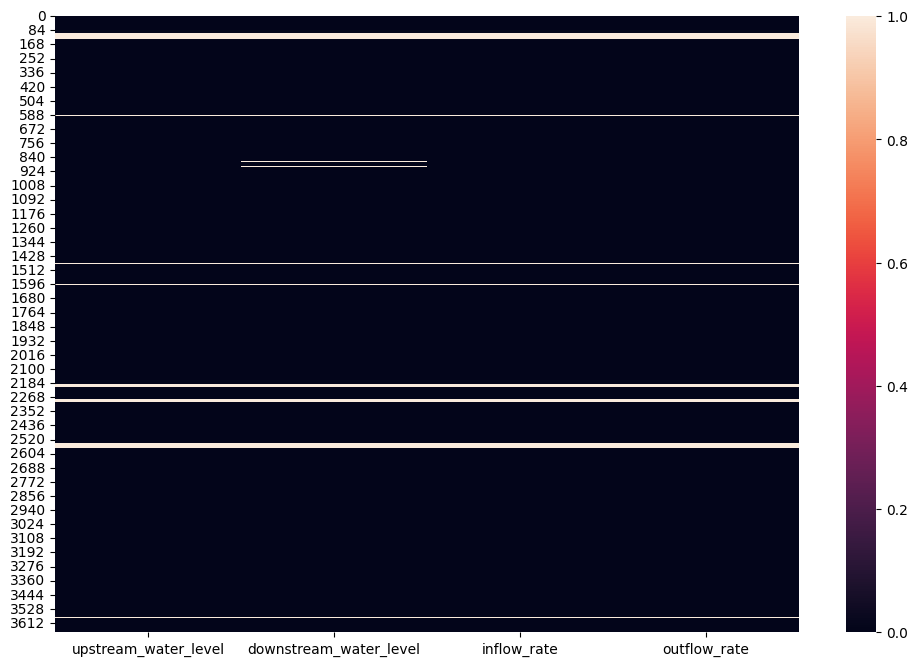

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

# ***DATA VISUALIZATION***

<Axes: >

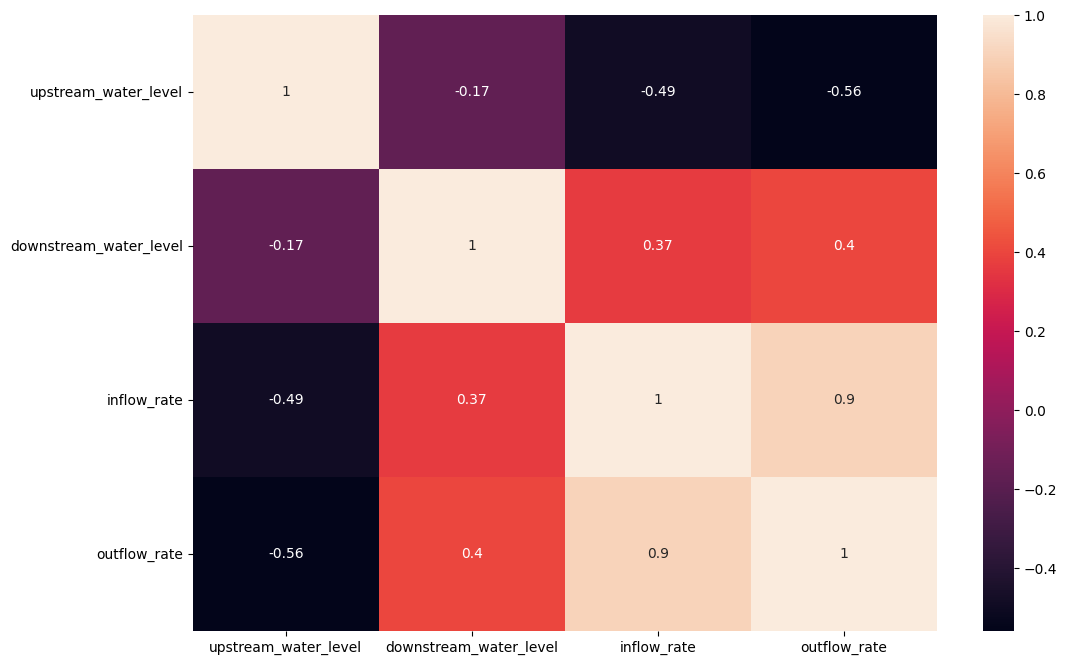

In [ ]:
plt.figure(figsize= (12,8))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='downstream_water_level', ylabel='count'>

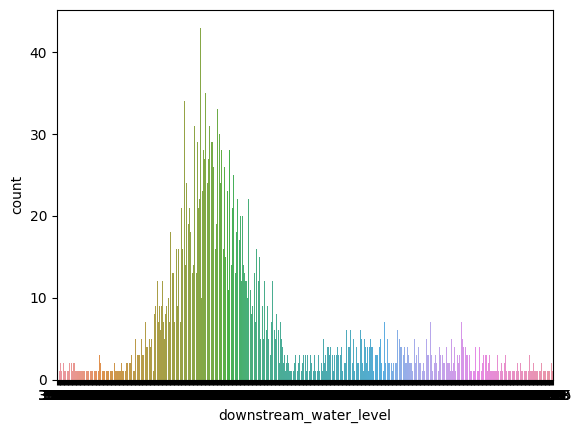

In [ ]:
sns.countplot(x="downstream_water_level",data=df)

In [ ]:
df["downstream_water_level"].value_counts()

65.06    43
65.18    38
65.12    35
64.86    34
65.27    33
         ..
69.16     1
68.91     1
70.36     1
68.95     1
43.86     1
Name: downstream_water_level, Length: 623, dtype: int64

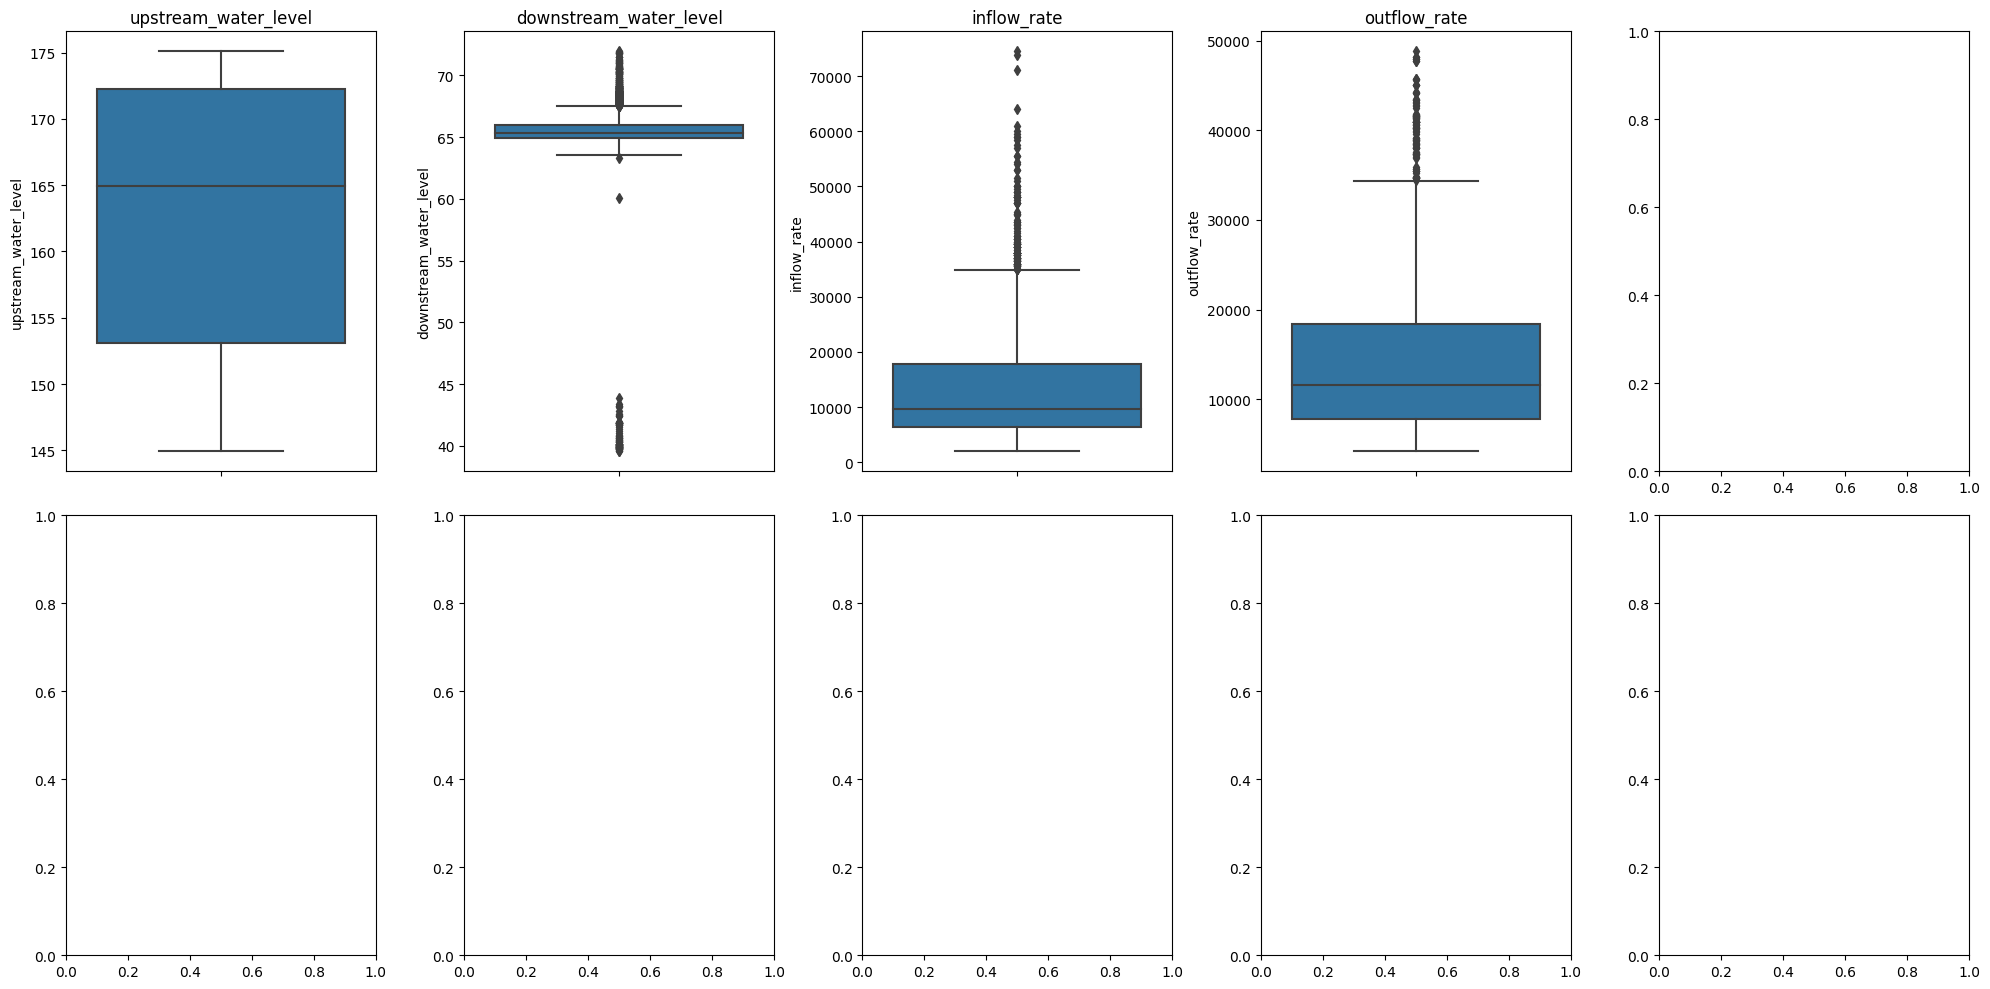

In [ ]:
#Visualization dataset also checking for outliers

fig, ax = plt.subplots(ncols=5, nrows=2, figsize = (20,10))

ax = ax.flatten()

index = 0

for col, values in df.items():
    sns.boxplot(y=values, ax=ax[index])
    ax[index].set_title(col)  # Set the title for each subplot

    index += 1

plt.tight_layout()
plt.show()

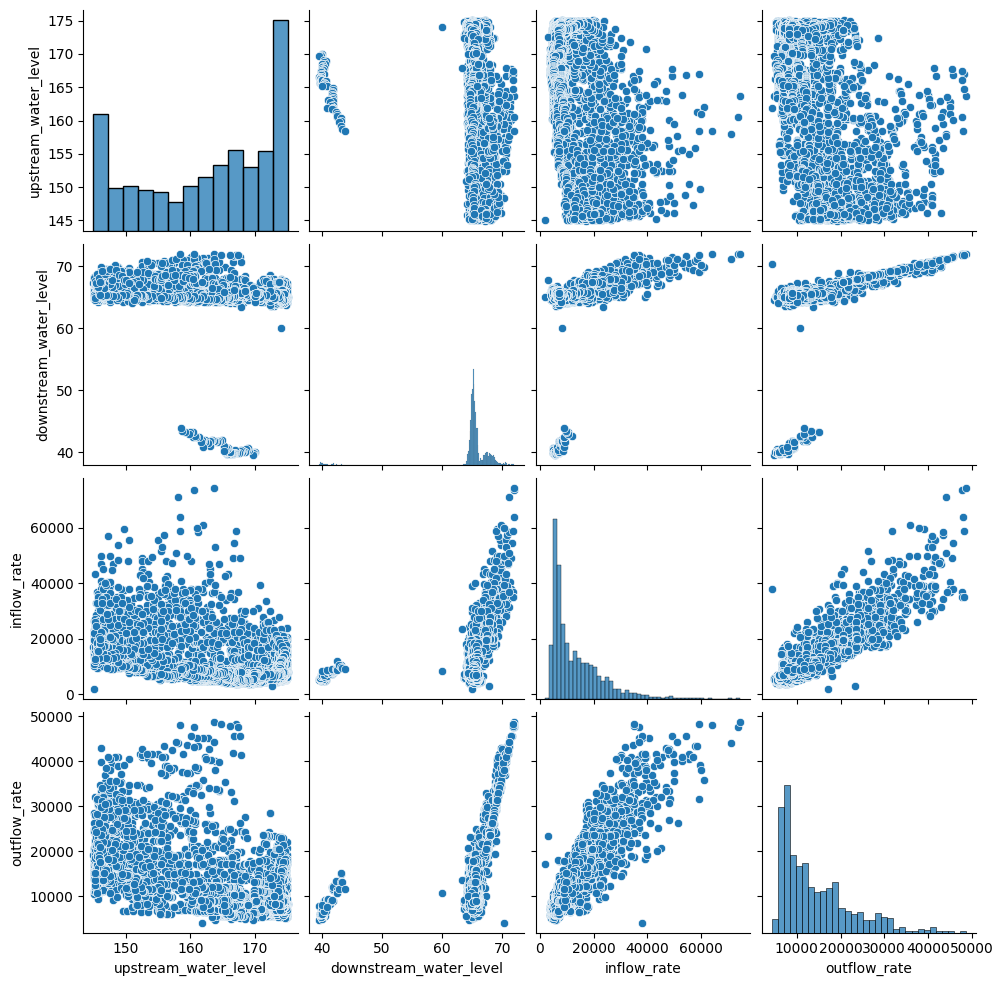

In [ ]:
sns.pairplot(df)

In [ ]:
fig = px.scatter(df,x = "downstream_water_level",y = "upstream_water_level",color = "inflow_rate",template="plotly_dark")
fig.show()

In [ ]:
fig = px.scatter(df,x = "downstream_water_level",y = "upstream_water_level",color = "outflow_rate",template="plotly_dark")
fig.show()

# ***FILLING NULL VALUES***

Text(0, 0.5, 'Percentage of missing values')

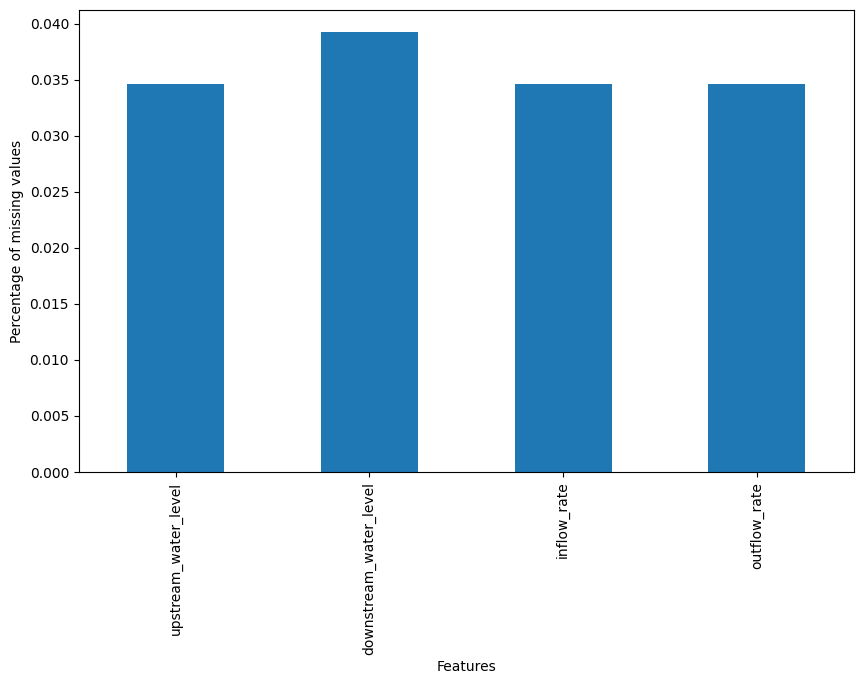

In [ ]:
df.isnull().mean().plot.bar(figsize= (10,6))
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")

In [ ]:
df["upstream_water_level"] = df["upstream_water_level"].fillna(df["upstream_water_level"].mean())  #going to fill the missing data with the means of all upstream_water_level value
df["downstream_water_level"] = df["downstream_water_level"].fillna(df["downstream_water_level"].mean())  #going to fill the missing data with the means of all downstream_water_level value
df["inflow_rate"] = df["inflow_rate"].fillna(df["inflow_rate"].mean())  #going to fill the missing data with the means of all inflow_rate value
df["outflow_rate"] = df["outflow_rate"].fillna(df["outflow_rate"].mean())  #going to fill the missing data with the means of all outflow_rate value

In [ ]:
df.isnull().sum()

upstream_water_level      0
downstream_water_level    0
inflow_rate               0
outflow_rate              0
dtype: int64

<Axes: >

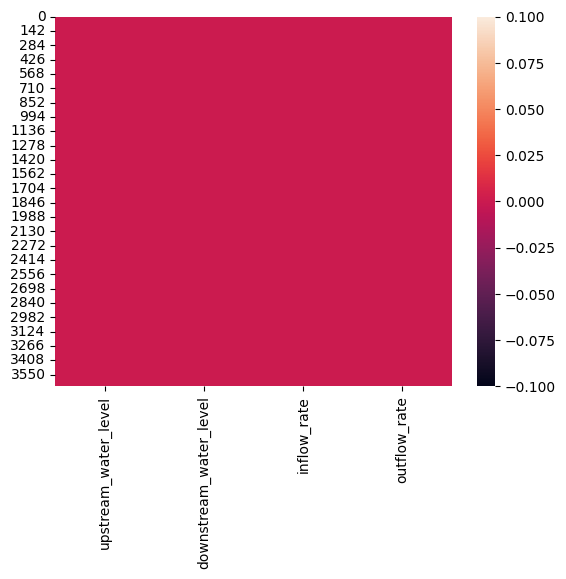

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
# convert float to integer
df['upstream_water_level'] = df['upstream_water_level'].astype(int)
df['downstream_water_level'] = df['downstream_water_level'].astype(int)
df['inflow_rate'] = df['inflow_rate'].astype(int)
df['outflow_rate'] = df['outflow_rate'].astype(int)

# print data types
print(df.dtypes)

upstream_water_level      int64
downstream_water_level    int64
inflow_rate               int64
outflow_rate              int64
dtype: object


# ***DATA PREPARATIONS FOR TRAINING THE PREDICTIONS***

In [ ]:
df.head()

,upstream_water_level,downstream_water_level,inflow_rate,outflow_rate
0,159,64,6500,7490
1,159,65,6100,8070
2,159,64,5800,8100
3,158,64,5800,8080
4,158,65,6600,8140


In [ ]:
x = df.drop("upstream_water_level",axis=1)
y = df["upstream_water_level"]

In [ ]:
x.shape , y.shape

((3667, 3), (3667,))

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.20216706, -0.73919707, -0.84494789],
       [ 0.05364612, -0.78274135, -0.77270332],
       [-0.20216706, -0.81539956, -0.76896653],
       ...,
       [-5.57424389, -0.37995678,  0.10295067],
       [-5.57424389, -0.41261499, -0.12125661],
       [-5.57424389, -0.46704533, -0.32055197]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape , x_test.shape

((2933, 3), (734, 3))

# ***LOGISTIC REGRESSION***

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

#Object of Logistic Regression
model_lr = LogisticRegression()

In [ ]:
#Training Model
model_lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#Making Prediction
pred_lr = model_lr.predict(x_test)

In [ ]:
#Accuracy Score
accuracy_score_lr = accuracy_score(y_test,pred_lr)
accuracy_score_lr*100

19.07356948228883

# ***DECISION TREE CLASSIFIER***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Creating the model object
model_dt = DecisionTreeClassifier(max_depth = 4)

In [ ]:
#Training of decision tree
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
#Making prediction using decision tree
pred_dt = model_dt.predict(x_test)

In [ ]:
#Accuracy Score
accuracy_score_dt = accuracy_score(y_test,pred_dt)
accuracy_score_dt*100

24.38692098092643

In [ ]:
#Confusion Matrix
cm2 = confusion_matrix(y_test,pred_dt)
cm2

array([[29,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16],
       [23,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  3,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 6,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3],
       [ 3,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4],
       [ 3,  2,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4],
       [ 5,  5,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2],
       [10,  1,  0,  0,  0,  0,  0,  0,  

# ***RANDOM FOREST CLASSIFIERS***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Creating model object
model_rf = RandomForestClassifier()

In [ ]:
#Training of Model Random Forest
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
#Making Prediction
pred_rf = model_rf.predict(x_test)

In [ ]:
#Accuracy Score
accuracy_score_rf = accuracy_score(y_test,pred_rf)
accuracy_score_rf*100

38.283378746594

In [ ]:
#Confusion Matrix
cm3 = confusion_matrix(y_test,pred_rf)
cm3

array([[27,  5,  0,  1,  0,  3,  1,  1,  0,  0,  0,  0,  0,  1,  0,  1,
         0,  0,  0,  1,  0,  2,  1,  0,  0,  0,  1,  0,  4,  4],
       [10,  4,  2,  2,  0,  4,  1,  1,  0,  0,  0,  1,  0,  1,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  1,  0],
       [ 2,  4,  0,  0,  1,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1],
       [ 2,  2,  0,  2,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
         1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  1,  1,  3,  1,  0,  1,  0,  1,  0,  0,  0,  1,  1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 2,  1,  0,  0,  0,  3,  0,  0,  1,  2,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 2,  1,  0,  0,  0,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  2,  0,  0,  3,  2,  

# ***kNN - K-NEIGHBORS CLASSIFIER***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Creating model object
model_knn = KNeighborsClassifier()

In [ ]:
for i in range(4,15):
  model_knn = KNeighborsClassifier(n_neighbors=i)

  #Training of Model kNN
  model_knn.fit(x_train,y_train)

  #Making Prediction
  pred_knn = model_knn.predict(x_test)

  #Accuracy Score
  accuracy_score_knn = accuracy_score(y_test,pred_knn)
  print(i,accuracy_score_knn*100)

4 33.65122615803814
5 32.42506811989101
6 31.471389645776565
7 30.65395095367847
8 30.65395095367847
9 29.972752043596728
10 30.381471389645775
11 29.56403269754768
12 31.062670299727518
13 30.79019073569482
14 30.517711171662125


In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=18)
model_knn.fit(x_train,y_train)
pred_knn = model_knn.predict(x_test)
accuracy_score_knn = accuracy_score(y_test,pred_knn)
print(accuracy_score_knn*100)

30.381471389645775


In [ ]:
#Confusion Matrix
cm4 = confusion_matrix(y_test,pred_knn)
cm4

array([[31,  5,  1,  1,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  2,  0,  0,  0,  0,  2,  0,  1,  7],
       [19,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  2,  0,
         0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,  3],
       [ 6,  3,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 5,  0,  0,  1,  0,  0,  0,  1,  1,  0,  2,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 1,  2,  0,  1,  0,  1,  0,  0,  0,  2,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  2],
       [ 4,  2,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  3],
       [ 4,  1,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 5,  0,  0,  1,  0,  0,  0,  2,  

# ***SUPPORT VECTOR MACHINE - SVM***

In [ ]:
from sklearn.svm import SVC

#Creating object of model
model_svm = SVC(kernel="rbf")

In [ ]:
#Training of Model SVM
model_svm.fit(x_train,y_train)

SVC()

In [ ]:
#Making Prediction
pred_svm = model_svm.predict(x_test)

In [ ]:
#Accuracy Score
accuracy_score_svm = accuracy_score(y_test,pred_svm)
accuracy_score_svm*100

22.070844686648503

# ***ADABOOST CLASSIFIERS***

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

#Making object of model
model_ada = AdaBoostClassifier(n_estimators=200,learning_rate=0.02)

In [ ]:
#Training of Model AdaBoost
model_ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=200)

In [ ]:
#Making Prediction
pred_ada = model_ada.predict(x_test)

In [ ]:
#Accuracy Score
accuracy_score_ada = accuracy_score(y_test,pred_ada)
accuracy_score_ada*100

18.66485013623978

# ***ACCURACY VISUALIZATION OF ML ALGORITHMS***


In [ ]:
models = pd.DataFrame({
    "Model": ["Logistic Regression",
              "Decision Tree",
              "Random Forest",
              "KNN",
              "SVM",
              "AdaBoost",
              ] ,

    "Accuracy Score" : [accuracy_score_lr, accuracy_score_dt, accuracy_score_rf,
                        accuracy_score_knn, accuracy_score_svm, accuracy_score_ada,
                        ]

})

In [ ]:
models

,Model,Accuracy Score
0,Logistic Regression,0.202997
1,Decision Tree,0.250681
2,Random Forest,0.382834
3,KNN,0.303815
4,SVM,0.220708
5,AdaBoost,0.186649


,Model,Accuracy Score
2,Random Forest,0.382834
3,KNN,0.303815
1,Decision Tree,0.250681
4,SVM,0.220708
0,Logistic Regression,0.202997
5,AdaBoost,0.186649


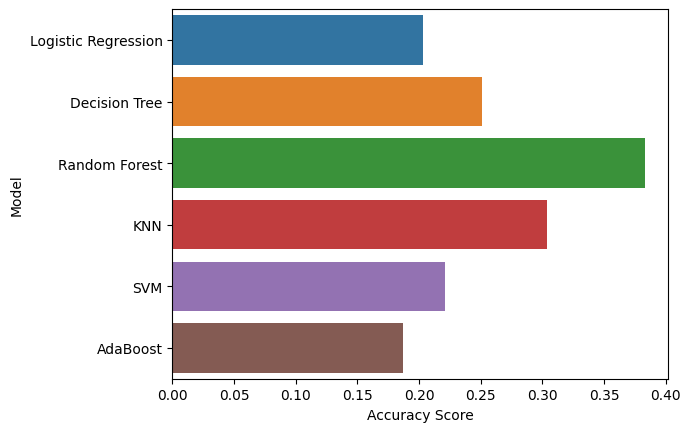

In [ ]:
sns.barplot(x="Accuracy Score", y="Model", data=models)
models.sort_values(by="Accuracy Score", ascending= False)